In [3]:
import numpy as np
import frites
import xfrites
import xarray as xr
from itertools import product

import matplotlib.pyplot as plt

plt.style.use('default')

%matplotlib inline

# load the data

In [4]:
dt = xr.load_dataset('/home/etienne/DATA/Study/final.nc')

# Line comparison

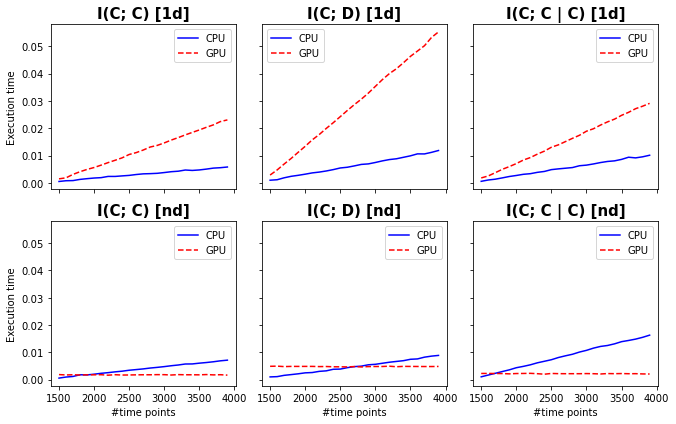

In [5]:
dt_mv = dt.mean('mv').to_array('cond')

fig, axs = plt.subplots(2, 3, figsize=(9.5, 6), sharex=True, sharey=True)

titles = {'gg': 'I(C; C)', 'gd': 'I(C; D)', 'ggg': 'I(C; C | C)'}
for n_f, fcn in enumerate(['gg', 'gd', 'ggg']):
    for n_d, dim in enumerate(['1d', 'nd']):
        for imp in ['cpu', 'gpu']:
            ls = '-' if imp == 'cpu' else '--'
            col = 'red' if imp == 'gpu' else 'blue'
            sel = f'{fcn}_{imp}_{dim}'
            plt.sca(axs[n_d, n_f])
            plt.plot(dt.times.data, dt_mv.sel(cond=sel), linestyle=ls, color=col, label=imp.upper())
        plt.title(f"{titles[fcn]} [{dim}]", fontsize=15, fontweight='bold')
        plt.legend()
        if n_f == 0: plt.ylabel("Execution time")
        if n_d == 1: plt.xlabel("#time points")

plt.tight_layout()

# Times / mv (imshow)

In [6]:
sel_cpu = [f"{fcn}_cpu_{dim}" for dim, fcn in product(['1d', 'nd'], ['gg', 'gd', 'ggg'])]
sel_gpu = [f"{fcn}_gpu_{dim}" for dim, fcn in product(['1d', 'nd'], ['gg', 'gd', 'ggg'])]

dt_cpu = dt.to_array('cond').sel(cond=sel_cpu)
dt_cpu['cond'] = [k.replace('_cpu', '') for k in dt_cpu['cond'].data]
dt_gpu = dt.to_array('cond').sel(cond=sel_gpu)
dt_gpu['cond'] = [k.replace('_gpu', '') for k in dt_gpu['cond'].data]
dt_diff = (1 / dt_gpu) - (1 / dt_cpu)


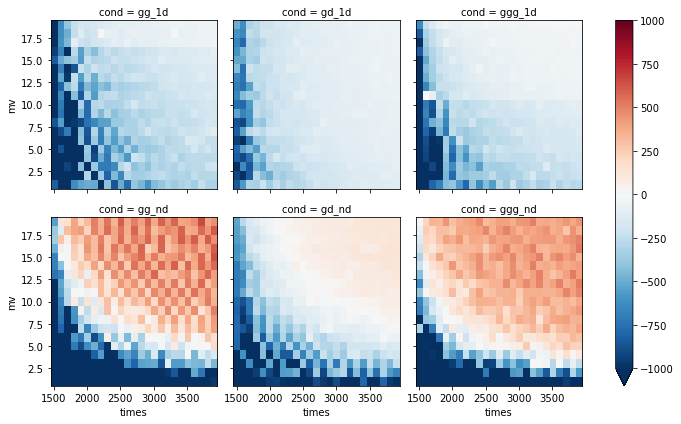

In [7]:
dt_diff.plot.imshow(x='times', y='mv', col='cond', col_wrap=3, cmap='RdBu_r', vmin=-1000, vmax=1000)